# Utilities

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [3]:
categories = {
    0: "Empty",
    1: "Tweezers",
    2: "Needle_driver"
}

colors = {
    0: (255, 0, 0),   # empty is red
    1: (0, 255, 0),   # tweezers is green
    2: (0, 0, 255)    # blue is needle driver
}

# Models comparisons:

## mAp and Loss graphs

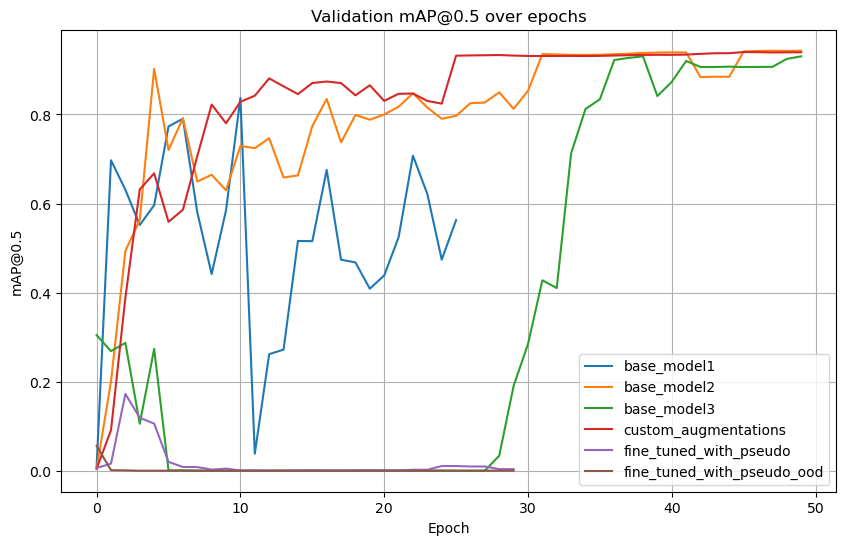

In [4]:
def plot_metric(run_name, metric_name):
    path = f"runs/detect/{run_name}/results.csv"
    df = pd.read_csv(path)
    plt.plot(df[metric_name], label=run_name)

plt.figure(figsize=(10, 6))
for run in ['base_model1', 'base_model2', 'base_model3','custom_augmentations','fine_tuned_with_pseudo','fine_tuned_with_pseudo_ood']:
    plot_metric(run, 'metrics/mAP50(B)')
plt.legend()
plt.title("Validation mAP@0.5 over epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP@0.5")
plt.grid()
plt.show()

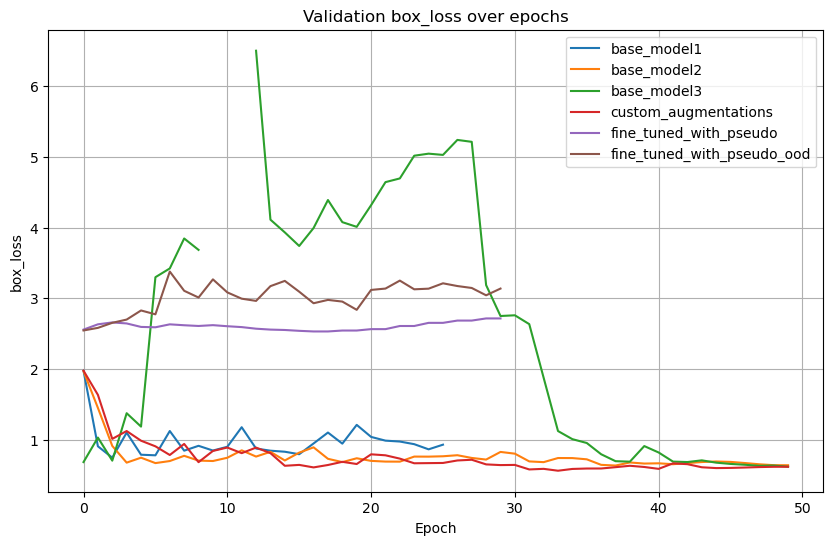

In [7]:
plt.figure(figsize=(10, 6))
for run in ['base_model1', 'base_model2', 'base_model3','custom_augmentations','fine_tuned_with_pseudo', 'fine_tuned_with_pseudo_ood']:
    plot_metric(run, 'val/box_loss')
plt.legend()
plt.title("Validation box_loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("box_loss")
plt.grid()
plt.show()

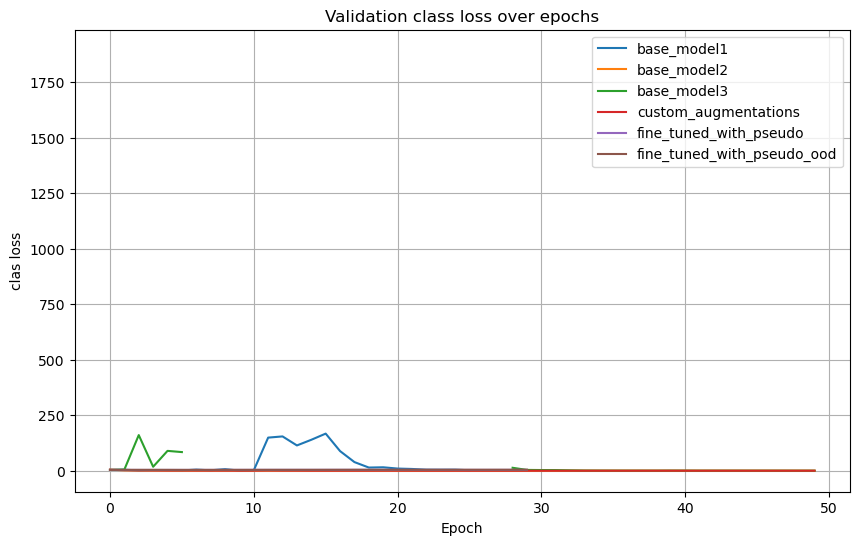

In [8]:
plt.figure(figsize=(10, 6))
for run in ['base_model1', 'base_model2', 'base_model3','custom_augmentations','fine_tuned_with_pseudo', 'fine_tuned_with_pseudo_ood']:
    plot_metric(run, 'val/cls_loss')
plt.legend()
plt.title("Validation class loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("clas loss")
plt.grid()
plt.show()

In [ ]:
# Define your models and labels
models = {
    "nano_model": "runs/detect/base_model1/weights/best.pt",
    "small_model": "runs/detect/base_model2/weights/best.pt",
    "large_model": "runs/detect/base_model3/weights/best.pt",
    "custom_augmented": "runs/detect/custom_augmentations2/weights/best.pt",
    "semi_supervised_id": "runs/detect/fine_tuned_with_pseudo/weights/best.pt",
    "semi_supervised_ood" : "runs/detect/fine_tuned_with_pseudo_ood/weights/best.pt"
}


data_yaml = { "nano_model": "surgical.yaml",
            "small_model": "surgical.yaml",
            "large_model": "surgical.yaml",
            "custom_augmented":"custom_aug.yaml",
            "semi_supervised_id": "pseudo.yaml",
            "semi_supervised_ood" : "pseudo_ood.yaml"}

results = []
for name, path in models.items():
    model = YOLO(path)

    # Evaluate on training set
    train_metrics = model.val(split='train', data=data_yaml[name], verbose=False)
    # Evaluate on validation set
    val_metrics = model.val(split='val', data=data_yaml[name], verbose=False)
    print(train_metrics.results_dict)
    results.append({
        "model": name,
        "train_mAP50": train_metrics.box.map50,
        "val_mAP50": val_metrics.box.map50,
        # "train_loss": train_metrics.box.loss,
        "train_loss": train_metrics.results_dict['metrics/mAP50-95(B)'],
        # "val_loss": val_metrics.box.loss
        "val_loss": val_metrics.results_dict['metrics/mAP50-95(B)']
    })

df = pd.DataFrame(results)
df.to_csv("summary.csv")
print(df)


Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)


YOLOv9c summary (fused): 156 layers, 25,321,561 parameters, 0 gradients, 102.3 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.4 ms, read: 44.9±19.3 MB/s, size: 7329.4 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/train... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:02<00:00, 25.65it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.44s/it]


                   all         61        135      0.849      0.905      0.917      0.721
Speed: 1.5ms preprocess, 5.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val31
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 1.6±2.2 ms, read: 44.4±15.3 MB/s, size: 5916.1 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 32.85it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


                   all         10         22      0.757      0.733      0.773      0.621
Speed: 0.1ms preprocess, 7.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val32
{'metrics/precision(B)': 0.8485996572451482, 'metrics/recall(B)': 0.9049781534105539, 'metrics/mAP50(B)': 0.9171284871570912, 'metrics/mAP50-95(B)': 0.721301444334386, 'fitness': 0.7408841486166566}
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
YOLOv9s summary (fused): 197 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.4 ms, read: 50.6±25.1 MB/s, size: 7066.9 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/train... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:02<00:00, 29.56it/s]


WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.28s/it]


                   all         61        135      0.997          1      0.995      0.932
Speed: 0.6ms preprocess, 2.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val33
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 0.4±0.4 ms, read: 39.4±16.7 MB/s, size: 5002.0 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 32.89it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


                   all         10         22      0.987      0.904      0.943      0.766
Speed: 0.1ms preprocess, 2.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val34
{'metrics/precision(B)': 0.9965066213437074, 'metrics/recall(B)': 1.0, 'metrics/mAP50(B)': 0.995, 'metrics/mAP50-95(B)': 0.9316790191903344, 'fitness': 0.9380111172713009}
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
YOLOv9e summary (fused): 279 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.4 ms, read: 39.5±20.9 MB/s, size: 4642.3 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/train... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:02<00:00, 27.27it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]


                   all         61        135      0.919      0.956      0.974      0.837
Speed: 0.8ms preprocess, 12.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val35
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 3.6±6.9 ms, read: 37.7±25.1 MB/s, size: 5749.0 KB)


val: Scanning /datashare/HW1/labeled_image_data/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 23.41it/s]

WARNING ⚠️ val: Cache directory /datashare/HW1/labeled_image_data/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


                   all         10         22      0.857       0.88       0.93      0.725
Speed: 0.1ms preprocess, 13.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val36
{'metrics/precision(B)': 0.918518637094421, 'metrics/recall(B)': 0.9558361571768472, 'metrics/mAP50(B)': 0.9737413525838008, 'metrics/mAP50-95(B)': 0.8371371903651227, 'fitness': 0.8507976065869906}
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
YOLOv9s summary (fused): 197 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3851.3±1929.1 MB/s, size: 1626.3 KB)


val: Scanning /home/student/HW1/data/augmented/labels/train.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


                   all         61        135      0.998      0.995      0.995      0.914
Speed: 2.7ms preprocess, 3.9ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/val37
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2248.6±1079.1 MB/s, size: 7100.1 KB)


val: Scanning /home/student/HW1/data/augmented/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


                   all         10         22      0.985      0.932      0.941      0.828
Speed: 0.1ms preprocess, 7.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val38
{'metrics/precision(B)': 0.9983307333972201, 'metrics/recall(B)': 0.9952173883695212, 'metrics/mAP50(B)': 0.995, 'metrics/mAP50-95(B)': 0.9137779789409143, 'fitness': 0.9219001810468229}
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
YOLOv9s summary (fused): 197 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 27.5±6.9 MB/s, size: 1696.4 KB)


val: Scanning /home/student/HW1/data/pseudo/labels/train.cache... 374 images, 4 backgrounds, 370 corrupt: 100%|██████████| 374/374 [00:00<?, ?it/s]

train: /home/student/HW1/data/pseudo/images/train/20_2_24_1_frame0000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1889.4      1010.1      441.61      943.58]
train: /home/student/HW1/data/pseudo/images/train/20_2_24_1_frame0029.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1888.3        1017      456.91       928.3      1182.9      1266.3      1050.1      605.96]
train: /home/student/HW1/data/pseudo/images/train/20_2_24_1_frame0058.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1899.7      1032.8      456.27      952.86      1202.1      1338.1      1003.7      607.59]
train: /home/student/HW1/data/pseudo/images/train/20_2_24_1_frame0087.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1897.4      1029.3      455.06      943.52      3018.9      956.74       978.4      772.35      1183.9      1407.9      1078.6       610.5]
train: /home


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]
/anaconda/envs/py38_default/lib/python3.10/site-packages/ultralytics/utils/metrics.py:548: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/anaconda/envs/py38_default/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda/envs/py38_default/lib/python3.10/site-packages/ultralytics/utils/metrics.py:593: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/anaconda/envs/py38_default/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/anaconda/envs/py38_default/lib/python3.10/site-packages/ultralytics/utils/metrics.py:593: RuntimeWarning: Mean of empty slice.
 

                   all          4          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 0.1ms preprocess, 10.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val39
Ultralytics 8.3.146 🚀 Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (Tesla V100-PCIE-16GB, 16144MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2060.6±860.2 MB/s, size: 5507.0 KB)


val: Scanning /home/student/HW1/data/pseudo/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


                   all         10         22      0.989      0.901      0.944      0.768
Speed: 0.1ms preprocess, 5.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val40
{'metrics/precision(B)': 0.0, 'metrics/recall(B)': 0.0, 'metrics/mAP50(B)': 0.0, 'metrics/mAP50-95(B)': 0.0, 'fitness': 0.0}
              model  train_mAP50  val_mAP50  train_loss  val_loss
0        nano_model     0.917128   0.773178    0.721301  0.621140
1       small_model     0.995000   0.942708    0.931679  0.766172
2       large_model     0.973741   0.930470    0.837137  0.725121
3  custom_augmented     0.995000   0.941101    0.913778  0.828464
4   Semi_Supervised     0.000000   0.944083    0.000000  0.768413


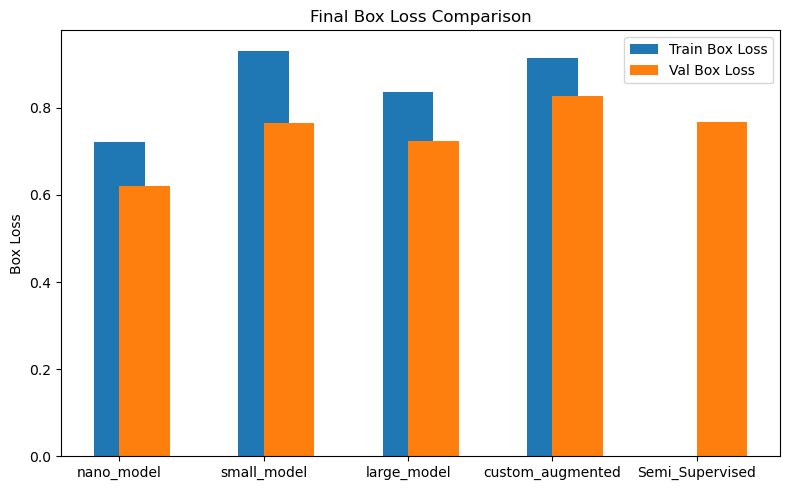

In [19]:
plt.figure(figsize=(8, 5))
x = df["model"]
plt.bar(x, df["train_loss"], width=0.35, label="Train Box Loss", align='center')
plt.bar(x, df["val_loss"], width=0.35, label="Val Box Loss", align='edge')
plt.ylabel("Box Loss")
plt.title("Final Box Loss Comparison")
plt.legend()
plt.tight_layout()
plt.show()

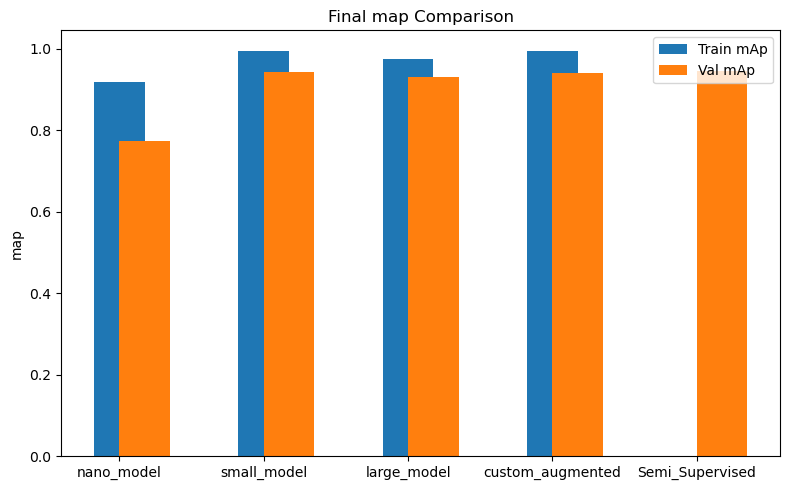

In [16]:
plt.figure(figsize=(8, 5))
x = df["model"]
plt.bar(x, df["train_mAP50"], width=0.35, label="Train mAp", align='center')
plt.bar(x, df["val_mAP50"], width=0.35, label="Val mAp", align='edge')
plt.ylabel("map")
plt.title("Final map Comparison")
plt.legend()
plt.tight_layout()
plt.show()

## On vaidation dataset

Looping through all images in validation set, drawing the boxes and saving them

In [10]:
main_root = "/datashare/HW1/"
imgs_dir = main_root + "labeled_image_data/images/"
imgs_val_dir = imgs_dir + "val/"

In [ ]:
base_model1 = YOLO("runs/detect/base_model1/weights/best.pt")
base_model2 = YOLO("runs/detect/base_model2/weights/best.pt")
base_model3 = YOLO("runs/detect/base_model3/weights/best.pt")
custom_augment = YOLO("runs/detect/custom_augmentations/weights/best.pt")
pseudo_model = YOLO("runs/detect/fine_tuned_with_pseudo/weights/best.pt")
pseudo_model_ood = YOLO("runs/detect/fine_tuned_with_pseudo_ood/weights/best.pt")

In [12]:
def draw_predicted_boxes(results, image):
    for result in results:
        boxes = result.boxes.xywh.cpu().numpy()
        confs = result.boxes.conf.cpu().numpy()
        class_ids = result.boxes.cls.cpu().numpy().astype(int)

        for (x_c, y_c, bw, bh), conf, cls in zip(boxes, confs, class_ids):
            x1 = int((x_c - bw / 2))
            y1 = int((y_c - bh / 2))
            x2 = int((x_c + bw / 2))
            y2 = int((y_c + bh / 2))

            color = colors.get(cls, (255, 255, 255))
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

            label = f"{categories.get(cls, 'Unknown')} {conf:.2f}"
            cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return image

In [ ]:
image_files = [f for f in os.listdir(imgs_val_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(imgs_val_dir, image_file)
    results = base_model_no_aug.predict(source=image_path, conf=0.3)
    image = cv2.imread(image_path) # original image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape
    
    image = draw_predicted_boxes(results, image)
            
    # Saving the img
    cv2.imwrite(f"models_predictions/base_model_no_aug/" + image_file,
                cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    
    # Show image - doesn't work on ubuntu
    # cv2.imshow("Prediction", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()